
---

### **1. Adam (Adaptive Moment Estimation)**
   - **Description**: Adam combines features from both SGD with Momentum and RMSprop, utilizing both a moving average of past gradients (momentum) and a moving average of past squared gradients (adaptive learning rate scaling).
   - **Key Use Cases**:
      - Useful in projects with sparse gradients, like NLP and recommendation systems.
      - Ideal for complex, deep architectures with large datasets where hyperparameter tuning is costly.
      - Often used in vision-based projects where fast convergence and robustness to noisy gradients are critical.
   - **Advantages**:
      - Requires less tuning, handles large parameter spaces efficiently, and offers fast convergence.
   - **Drawbacks**:
      - In some cases, Adam can converge to a local optimum quickly, which might not be the global minimum.
   
### **2. SGD with Momentum**
   - **Description**: SGD with Momentum accelerates convergence by taking into account previous updates to reduce oscillations and helps the model settle more effectively into optimal regions of the parameter space.
   - **Key Use Cases**:
      - Effective in projects requiring fine-grained updates to achieve optimal performance, such as computer vision tasks (e.g., image classification).
      - Useful in large-scale data projects where minimizing oscillations in loss is essential.
   - **Advantages**:
      - Reduces convergence time by overcoming small gradient regions and smoothing oscillations, which is especially valuable in convex and quasi-convex optimization problems.
      - Works well when gradients are noisy, stabilizing learning over time.
   - **Drawbacks**:
      - May overshoot optimal solutions in highly non-convex problems if momentum or learning rates are too high.

### **3. RMSprop (Root Mean Square Propagation)**
   - **Description**: RMSprop adapts the learning rate for each parameter based on the magnitude of its recent gradients, making it particularly effective for handling mini-batch learning.
   - **Key Use Cases**:
      - Particularly beneficial for tasks with noisy, sparse gradients or high-dimensional data (e.g., recommendation systems, reinforcement learning).
      - Useful in large-scale distributed machine learning projects where adaptive learning rates accelerate convergence.
   - **Advantages**:
      - Handles non-stationary objectives, such as reinforcement learning, well.
      - Provides stability for noisy gradients and sparsity in feature space, making it effective in high-dimensional spaces.
   - **Drawbacks**:
      - Tuning can be challenging, particularly when gradients vary greatly across different dimensions.

---

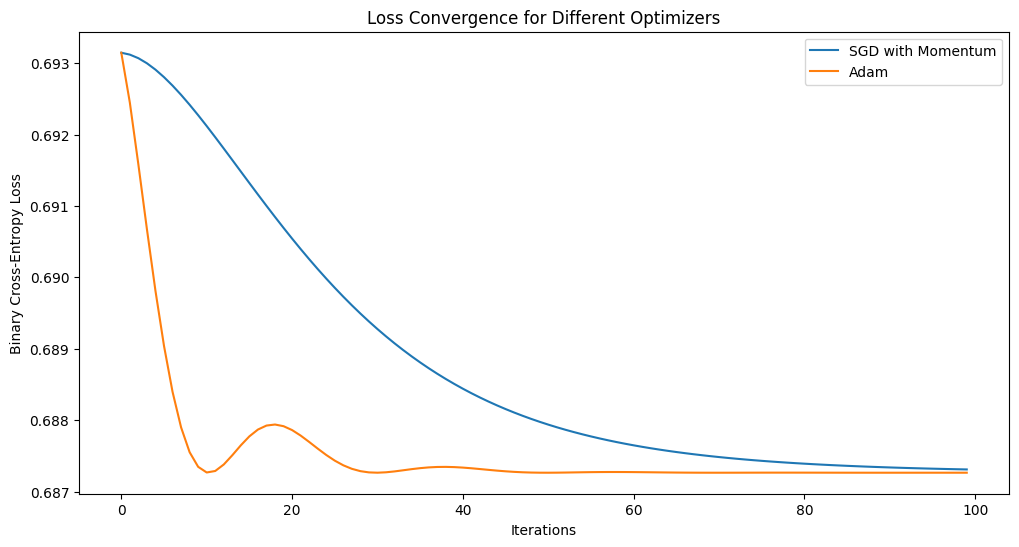

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
np.random.seed(42)
num_samples = 100
X = np.random.randn(num_samples, 2)  # 100 samples with 2 features
y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Label as 1 if product of features > 0

# Define sigmoid activation and binary cross-entropy loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy_loss(y_true, y_pred):
    # Small epsilon to avoid log(0) errors
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Define the optimizers
class StochasticGradientDescent:
    def __init__(self, learning_rate=0.01, momentum=0):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = None

    def update(self, weights, grad):
        if self.velocity is None:
            self.velocity = np.zeros_like(weights)
        self.velocity = self.momentum * self.velocity + (1 - self.momentum) * grad
        return weights - self.learning_rate * self.velocity

class Adam:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999):
        self.learning_rate = learning_rate
        self.epsilon = 1e-8
        self.beta1 = beta1
        self.beta2 = beta2
        self.m = None
        self.v = None

    def update(self, weights, grad):
        if self.m is None:
            self.m = np.zeros_like(grad)
            self.v = np.zeros_like(grad)
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * np.square(grad)
        m_hat = self.m / (1 - self.beta1)
        v_hat = self.v / (1 - self.beta2)
        return weights - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

# Train the model with each optimizer and collect loss history
def train(X, y, optimizer, num_iterations=100):
    weights = np.zeros(X.shape[1])
    loss_history = []
    for i in range(num_iterations):
        predictions = sigmoid(np.dot(X, weights))
        loss = binary_cross_entropy_loss(y, predictions)
        loss_history.append(loss)
        grad = np.dot(X.T, (predictions - y)) / y.size
        weights = optimizer.update(weights, grad)
    return loss_history

# Initialize optimizers
sgd_optimizer = StochasticGradientDescent(learning_rate=0.1, momentum=0.9)
adam_optimizer = Adam(learning_rate=0.01)

# Train models and record loss histories
sgd_loss = train(X, y, sgd_optimizer)
adam_loss = train(X, y, adam_optimizer)

# Plot the loss histories
plt.figure(figsize=(12, 6))
plt.plot(sgd_loss, label='SGD with Momentum')
plt.plot(adam_loss, label='Adam')
plt.xlabel('Iterations')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss Convergence for Different Optimizers')
plt.legend()
plt.show()


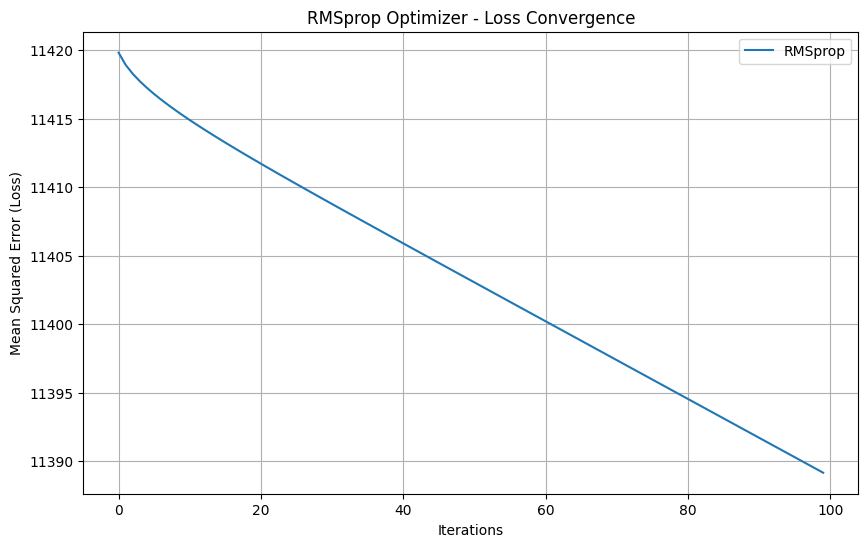

In [16]:
# Import necessary modules
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Redefine the RMSprop optimizer with a lower learning rate and default rho
class RMSprop:
    def __init__(self, learning_rate=0.001, rho=0.9):  # Lower learning rate to ensure stability
        self.learning_rate = learning_rate
        self.Eg = None
        self.eps = 1e-8
        self.rho = rho

    def update(self, w, grad_wrt_w):
        if self.Eg is None:
            self.Eg = np.zeros(np.shape(grad_wrt_w))
        self.Eg = self.rho * self.Eg + (1 - self.rho) * np.power(grad_wrt_w, 2)
        return w - self.learning_rate * grad_wrt_w / np.sqrt(self.Eg + self.eps)

# Generate synthetic dataset
np.random.seed(42)
X_train, y_train = make_regression(n_samples=100, n_features=2, noise=0.1)

# Initialize the RMSprop optimizer with adjusted parameters
rmsprop_optimizer = RMSprop(learning_rate=0.001, rho=0.9)
loss_history = []
initial_w = np.zeros(X_train.shape[1])  # Initialize weights

# Training loop for RMSprop
w = initial_w.copy()
for i in range(100):  # Number of iterations
    y_pred = X_train.dot(w)
    loss = np.mean((y_pred - y_train) ** 2)
    grad_wrt_w = X_train.T.dot(y_pred - y_train) / len(y_train)
    w = rmsprop_optimizer.update(w, grad_wrt_w)
    loss_history.append(loss)

# Plot the loss history for RMSprop
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label="RMSprop")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (Loss)")
plt.title("RMSprop Optimizer - Loss Convergence")
plt.legend()
plt.grid(True)
plt.show()
